## 📍 **Árvore de Decisão**

Neste documento, estamos utilizando os dados pré-processados para realizar a classificação do dataframe `'census.csv'` por meio do algoritmo de árvore de decisão.

### 📍 **Importação de Bibliotecas, Módulos e Variáveis essenciais**


In [1]:
! pip install yellowbrick

In [2]:
import pickle as pk
import matplotlib.pyplot as plt

### 📌 **Árvore de Decisão: conjunto sem balanceamento**

In [3]:
with open('../sample_data/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set, df_transformed, one_hot_encoder_census = pk.load(f)

In [4]:
X_census_training_set.shape, y_census_training_set.shape

((27676, 105), (27676,))

In [5]:
X_census_test_set.shape, y_census_test_set.shape

((4885, 105), (4885,))

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [7]:
tree_census = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_census.fit(X_census_training_set, y_census_training_set)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [8]:
predictor = tree_census.predict(X_census_test_set)
predictor

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [9]:
y_census_test_set

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [10]:
tree_census.classes_

array([' <=50K', ' >50K'], dtype=object)

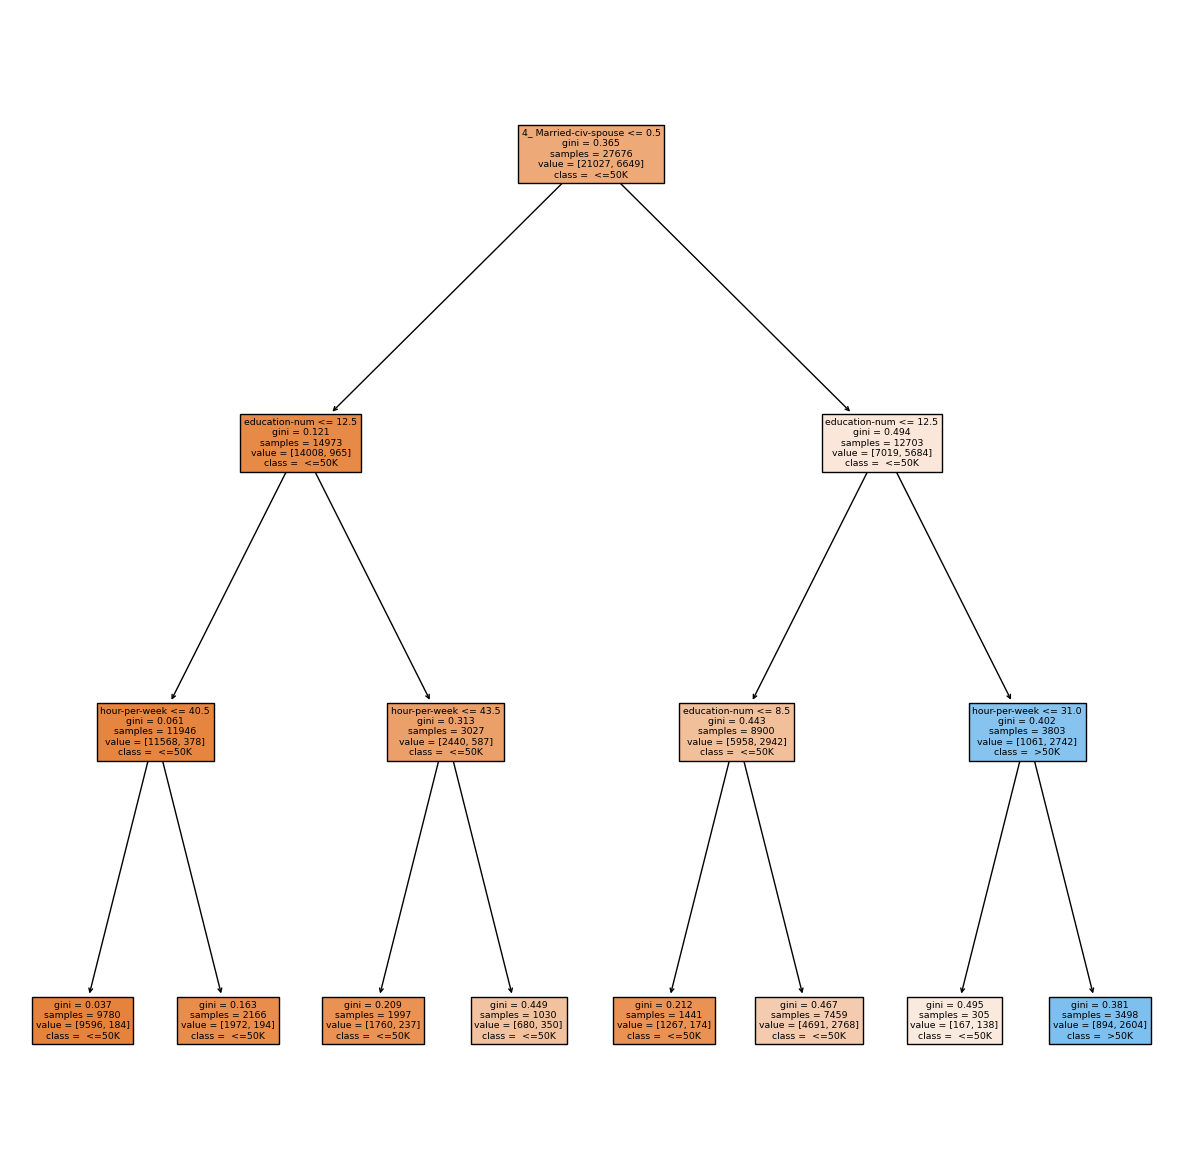

In [11]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
tree.plot_tree(tree_census, filled=True, class_names=list(tree_census.classes_), feature_names=list(df_transformed.columns));

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [13]:
accuracy_score(y_census_test_set, predictor)

0.8141248720573183

In [14]:
print(classification_report(y_census_test_set, predictor))

              precision    recall  f1-score   support

       <=50K       0.83      0.96      0.89      3693
        >50K       0.73      0.38      0.50      1192

    accuracy                           0.81      4885
   macro avg       0.78      0.67      0.69      4885
weighted avg       0.80      0.81      0.79      4885



0.8141248720573183

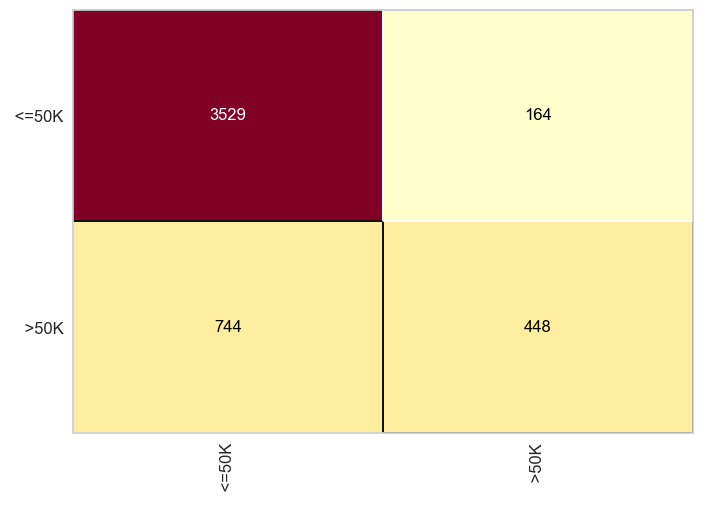

In [15]:
cm = ConfusionMatrix(tree_census)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Over Sampling'**

In [16]:
with open('../sample_data/census_ros.pkl', 'rb') as f_ros:
    X_census_training_set_ros, y_census_training_set_ros, X_census_test_set_ros, y_census_test_set_ros, df_transformed, one_hot_encoder_census = pk.load(f_ros)

In [17]:
X_census_training_set_ros.shape, y_census_training_set_ros.shape

((42054, 105), (42054,))

In [18]:
X_census_test_set_ros.shape, y_census_test_set_ros.shape

((4885, 105), (4885,))

In [19]:
tree_census_ros = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_census_ros.fit(X_census_training_set_ros, y_census_training_set_ros)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
predictor_ros = tree_census_ros.predict(X_census_test_set_ros)
predictor_ros

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype=object)

In [21]:
y_census_test_set_ros

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

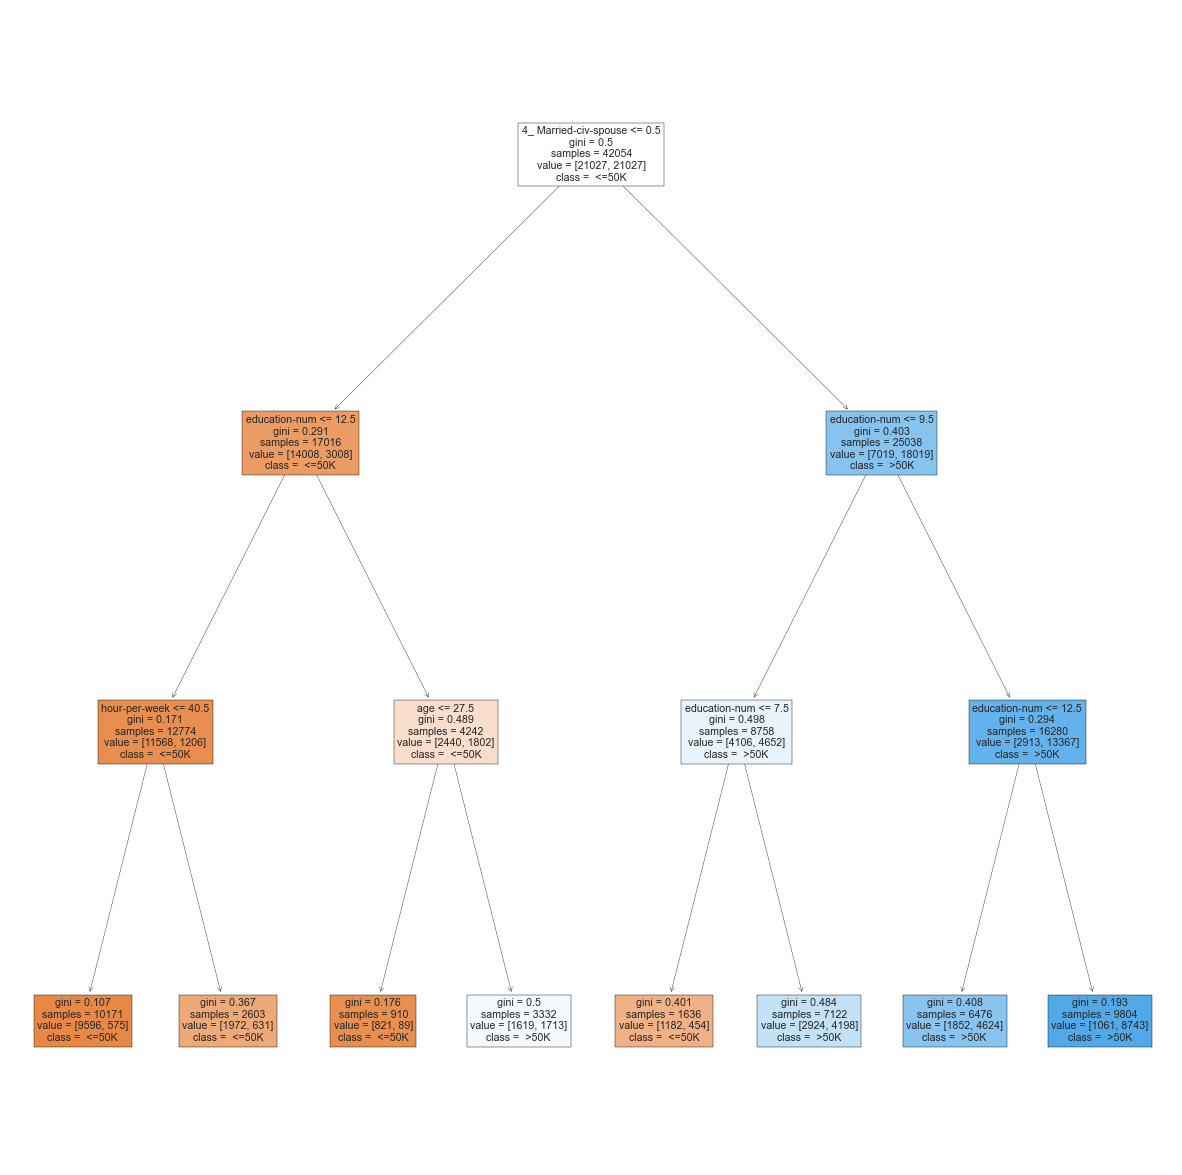

In [22]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
tree.plot_tree(tree_census_ros, filled=True, class_names=list(tree_census_ros.classes_), feature_names=list(df_transformed.columns));

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [23]:
accuracy_score(y_census_test_set_ros, predictor_ros)

0.7011258955987717

In [24]:
print(classification_report(y_census_test_set_ros, predictor_ros))

              precision    recall  f1-score   support

       <=50K       0.96      0.63      0.76      3693
        >50K       0.45      0.91      0.60      1192

    accuracy                           0.70      4885
   macro avg       0.70      0.77      0.68      4885
weighted avg       0.83      0.70      0.72      4885



0.7011258955987717

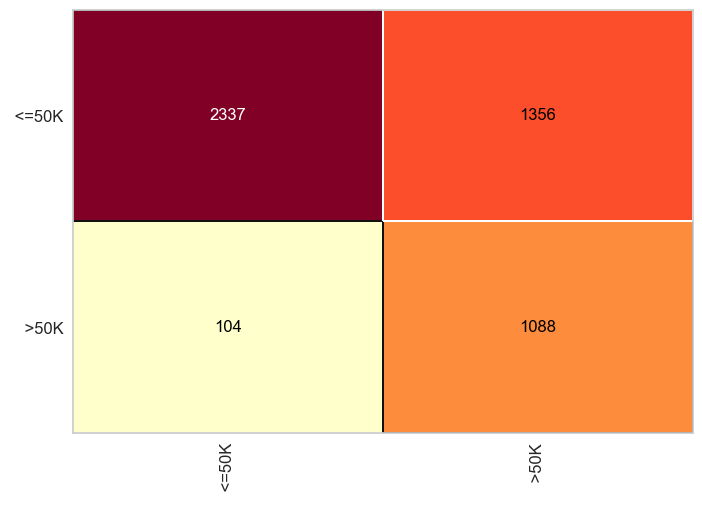

In [25]:
cm = ConfusionMatrix(tree_census_ros)
cm.fit(X_census_training_set_ros, y_census_training_set_ros)
cm.score(X_census_test_set_ros, y_census_test_set_ros)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'SMOTE'**

In [26]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [27]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42054, 105), (42054,))

In [28]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4885, 105), (4885,))

In [29]:
tree_census_smote = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_census_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
predictor_smote = tree_census_smote.predict(X_census_test_set_smote)
predictor_smote

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [31]:
y_census_test_set_smote

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

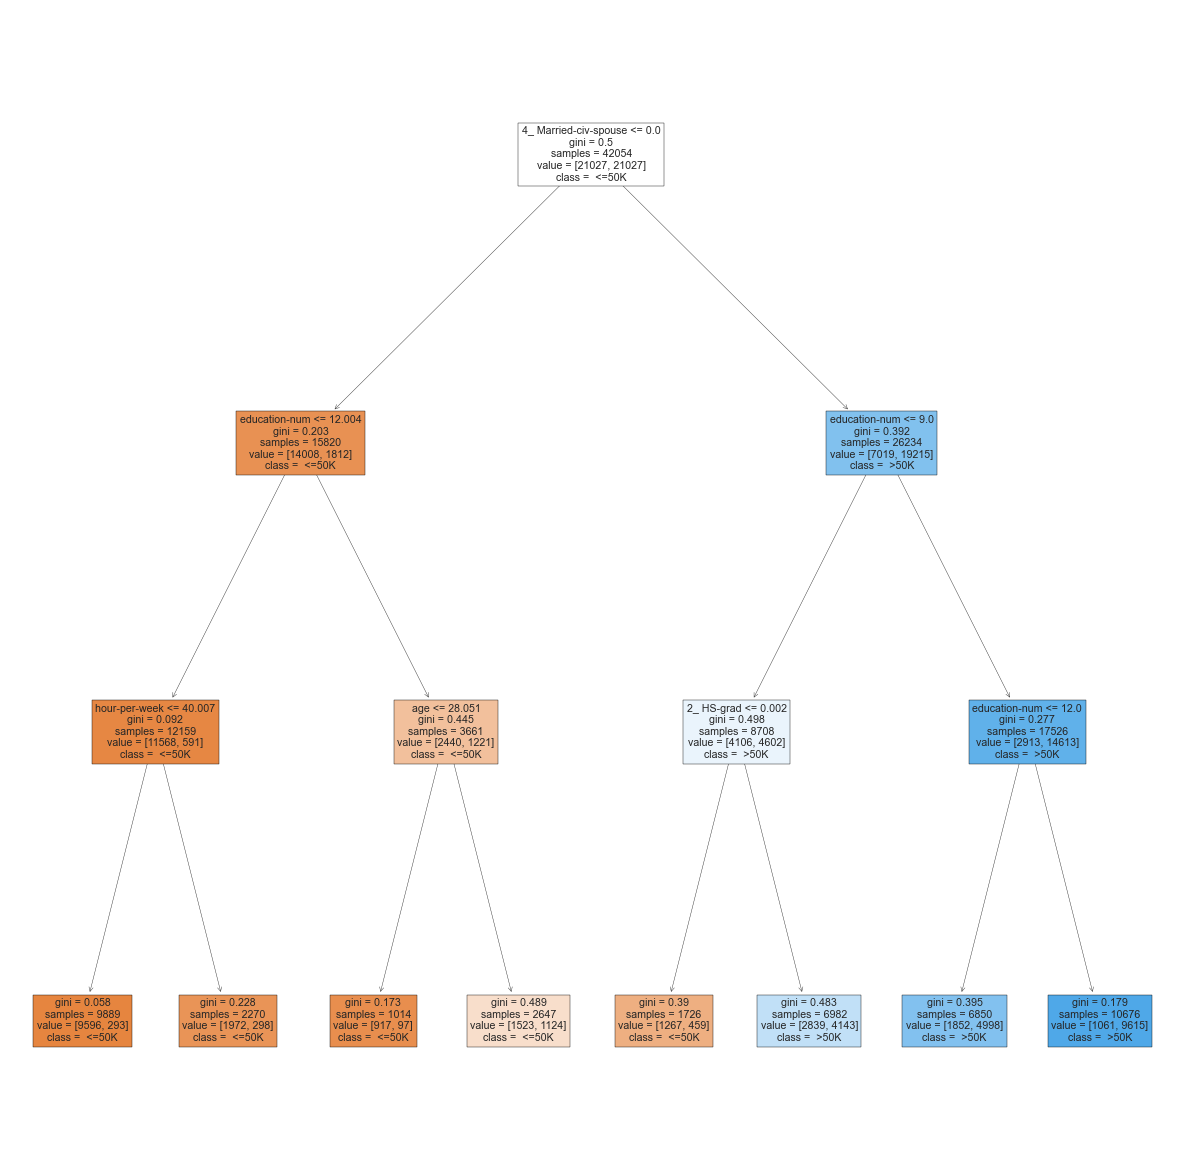

In [32]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
tree.plot_tree(tree_census_smote, filled=True, class_names=list(tree_census_smote.classes_), feature_names=list(df_transformed.columns));

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [33]:
accuracy_score(y_census_test_set_smote, predictor_smote)

0.7430910951893551

In [34]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.93      0.72      0.81      3693
        >50K       0.48      0.82      0.61      1192

    accuracy                           0.74      4885
   macro avg       0.70      0.77      0.71      4885
weighted avg       0.82      0.74      0.76      4885



0.7430910951893551

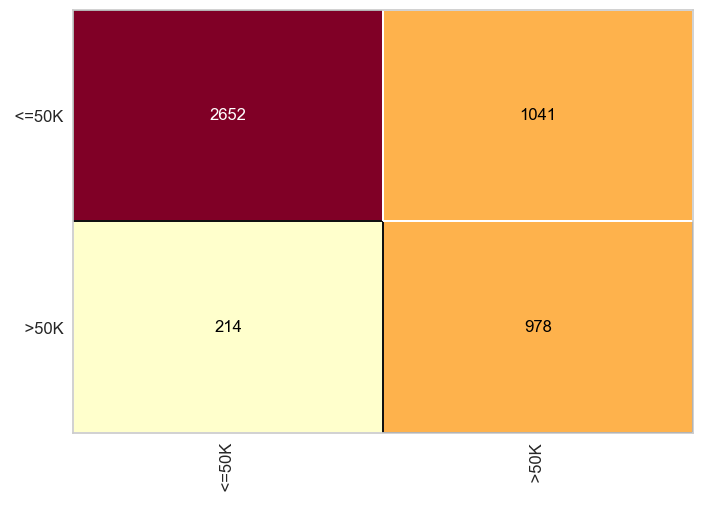

In [35]:
cm = ConfusionMatrix(tree_census_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Under Sampling'**

In [36]:
with open('../sample_data/census_rus.pkl', 'rb') as f_rus:
    X_census_training_set_rus, y_census_training_set_rus, X_census_test_set_rus, y_census_test_set_rus, df_transformed, one_hot_encoder_census = pk.load(f_rus)

In [37]:
X_census_training_set_rus.shape, y_census_training_set_rus.shape

((13298, 105), (13298,))

In [38]:
X_census_test_set_rus.shape, y_census_test_set_rus.shape

((4885, 105), (4885,))

In [39]:
tree_census_rus = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_census_rus.fit(X_census_training_set_rus, y_census_training_set_rus)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
predictor_rus = tree_census_rus.predict(X_census_test_set_rus)
predictor_rus

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype=object)

In [41]:
y_census_test_set_rus

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

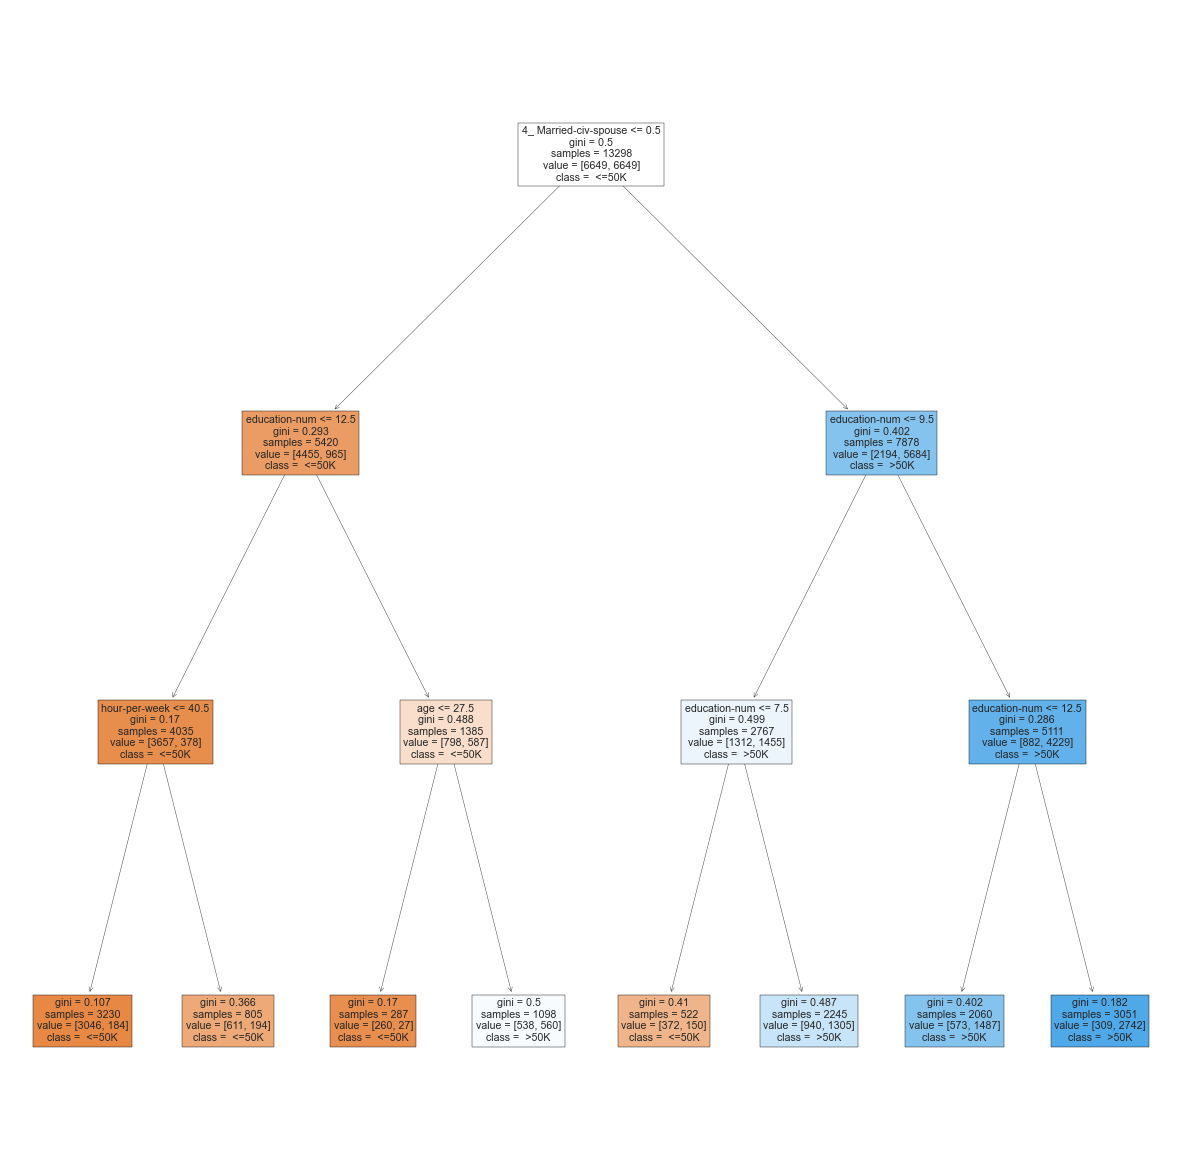

In [42]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
tree.plot_tree(tree_census_rus, filled=True, class_names=list(tree_census_rus.classes_), feature_names=list(df_transformed.columns));

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [43]:
accuracy_score(y_census_test_set_rus, predictor_rus)

0.7011258955987717

In [44]:
print(classification_report(y_census_test_set_rus, predictor_rus))

              precision    recall  f1-score   support

       <=50K       0.96      0.63      0.76      3693
        >50K       0.45      0.91      0.60      1192

    accuracy                           0.70      4885
   macro avg       0.70      0.77      0.68      4885
weighted avg       0.83      0.70      0.72      4885



0.7011258955987717

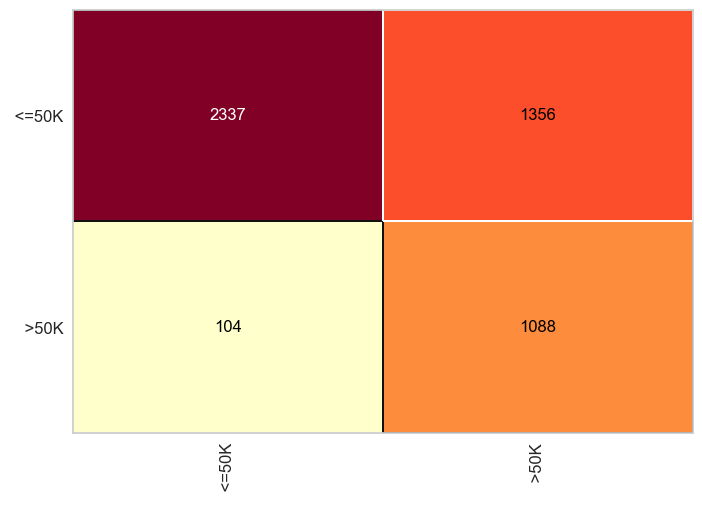

In [45]:
cm = ConfusionMatrix(tree_census_rus)
cm.fit(X_census_training_set_rus, y_census_training_set_rus)
cm.score(X_census_test_set_rus, y_census_test_set_rus)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'NearMiss'**

In [46]:
with open('../sample_data/census_nearmiss.pkl', 'rb') as f_nearmiss:
    X_census_training_set_nearmiss, y_census_training_set_nearmiss, X_census_test_set_nearmiss, y_census_test_set_nearmiss, df_transformed, one_hot_encoder_census = pk.load(f_nearmiss)

In [47]:
X_census_training_set_nearmiss.shape, y_census_training_set_nearmiss.shape

((13298, 105), (13298,))

In [48]:
X_census_test_set_nearmiss.shape, y_census_test_set_nearmiss.shape

((4885, 105), (4885,))

In [49]:
tree_census_nearmiss = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)
tree_census_nearmiss.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
predictor_nearmiss = tree_census_nearmiss.predict(X_census_test_set_nearmiss)
predictor_nearmiss

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [51]:
y_census_test_set_nearmiss

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

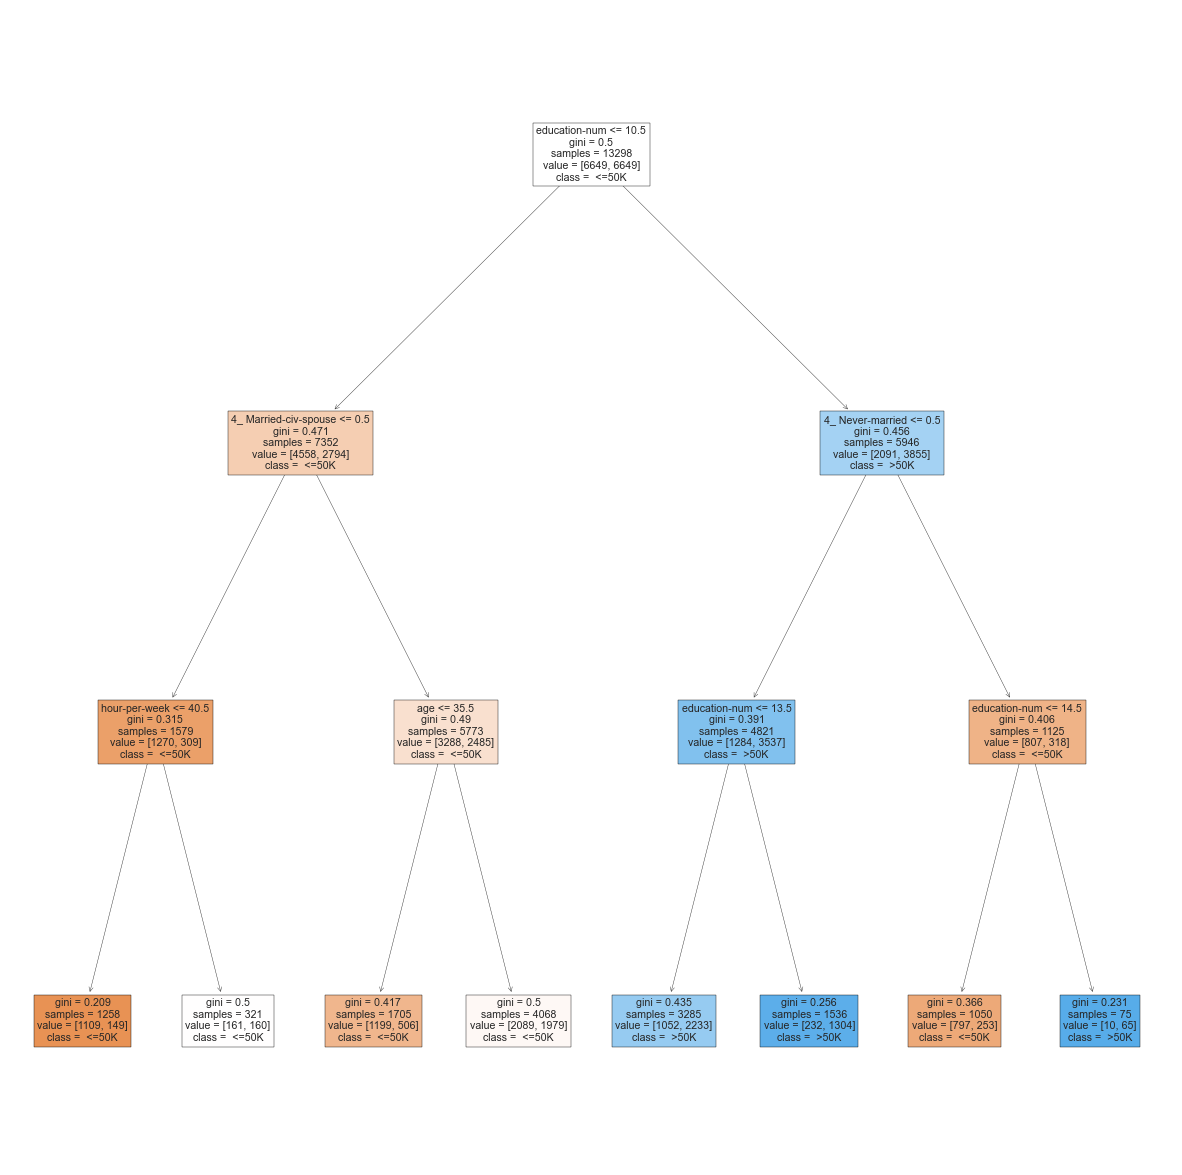

In [52]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
tree.plot_tree(tree_census_nearmiss, filled=True, class_names=list(tree_census_nearmiss.classes_), feature_names=list(df_transformed.columns));

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [53]:
accuracy_score(y_census_test_set_nearmiss, predictor_nearmiss)

0.7764585465711361

In [54]:
print(classification_report(y_census_test_set_nearmiss, predictor_nearmiss))

              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.85      3693
        >50K       0.54      0.53      0.54      1192

    accuracy                           0.78      4885
   macro avg       0.70      0.69      0.69      4885
weighted avg       0.77      0.78      0.78      4885



0.7764585465711361

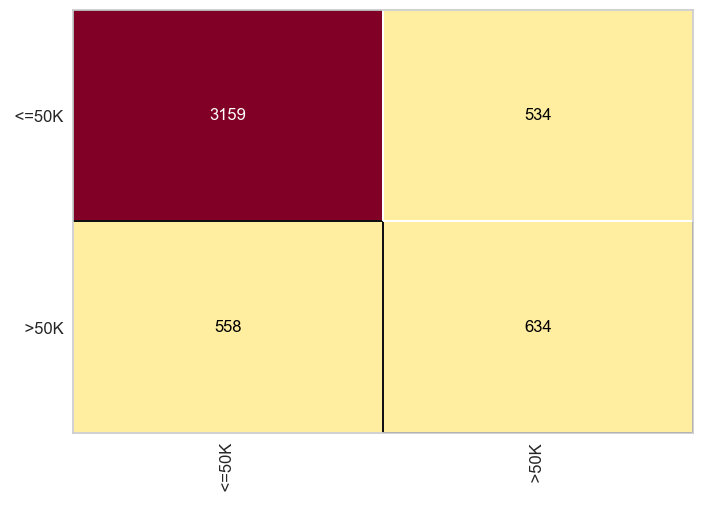

In [55]:
cm = ConfusionMatrix(tree_census_nearmiss)
cm.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)
cm.score(X_census_test_set_nearmiss, y_census_test_set_nearmiss)